In [12]:
from sklearn import datasets #importing dataset from sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [13]:
iris = datasets.load_iris()

# print("\n IRIS DATA :",iris.data);
print("\n IRIS FEATURES :\n",iris.feature_names)
print("\n IRIS TARGET :\n",iris.target) #target classification
#0 - setosa, 1 - versicolor, 2 - virginica 
print("\n IRIS TARGET NAMES:\n",iris.target_names)

X = pd.DataFrame(iris.data)  # converts the data to dataframe
# print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] # renaming columns
y = pd.DataFrame(iris.target) # converts the data to dataframe
y.columns = ['Targets']

print(X.Sepal_Length[0], X.Sepal_Width[0], y.Targets[0])


 IRIS FEATURES :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 IRIS TARGET :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

 IRIS TARGET NAMES:
 ['setosa' 'versicolor' 'virginica']
5.1 3.5 0


'How is data being plotted? \nThe first row of Sepal length & width corresponds to a particular o/p in this case (0)\nSo the first data point of sepal length vs width will be salmon.'

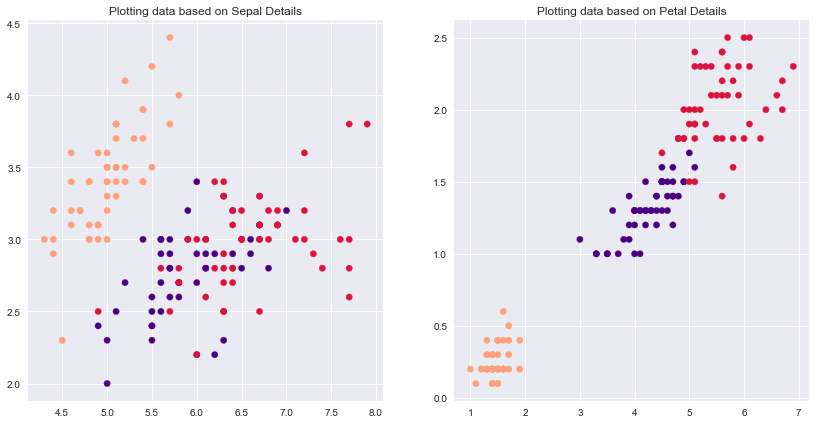

In [14]:

plt.figure(figsize=(14,7)) #size of plot
color = np.array(['lightsalmon', 'indigo', 'crimson'])

# print(y.Targets) 
# print(color[y.Targets])
'''when we pass y.Targets to color, y.Targets act as indices. 
So, lightsalmon is repeated no. of times, we have the index 0 in y.Targets.
We are doing this because the no. of colors should map to the target values/data points''' 
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=color[y.Targets], s=40)
plt.title('Plotting data based on Sepal Details')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=color[y.Targets], s=40)
plt.title('Plotting data based on Petal Details')

'''How is data being plotted? 
The first row of Sepal length & width corresponds to a particular o/p in this case (0)
So the first data point of sepal length vs width will be salmon.'''

In [15]:
# applying KMeans
from sklearn.cluster import KMeans
knn = KMeans(n_clusters=3, random_state=100)
knn.fit(X)
y_pred = knn.labels_

predicted_centroids = knn.cluster_centers_

print('\nActual target', iris.target)
print('\nPredicted target', y_pred)


Actual target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Predicted target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


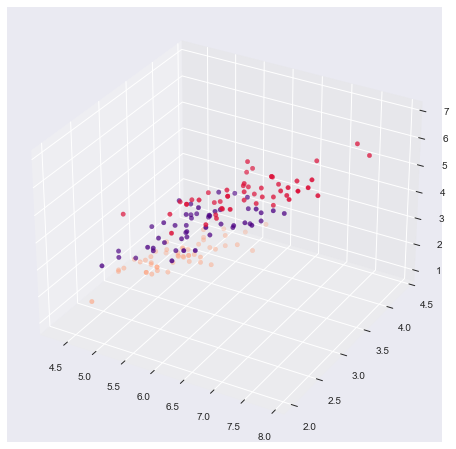

In [16]:

plt.figure(figsize=(13,8))
ax=plt.axes(projection ="3d")
ax.scatter3D(X.Sepal_Length, X.Sepal_Width, X.Petal_Length, c=color[y.Targets])

Text(0.5, 1.0, 'K Mean Classification')

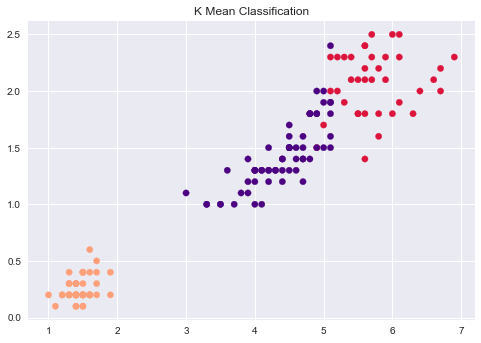

In [17]:
plt.subplot(1, 2, (1,2))
plt.scatter(X.Petal_Length, X.Petal_Width, c=color[y_pred], s=40)
plt.title('K Mean Classification')

In [18]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=100)
gmm.fit(X)

y_gmm_pred = gmm.predict(X)

print('\nGMM Means', gmm.means_)
print('\nK Means centroids', knn.cluster_centers_)
print('\nGMM Covariances', gmm.covariances_)
print('\nActual', iris.target)
print('\nGMM', y_gmm_pred)


GMM Means [[5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]
 [6.54639415 2.94946365 5.48364578 1.98726565]]

K Means centroids [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]

GMM Covariances [[[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]

 [[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]]

Actual [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

Text(0.5, 1.0, 'GMM Classification')

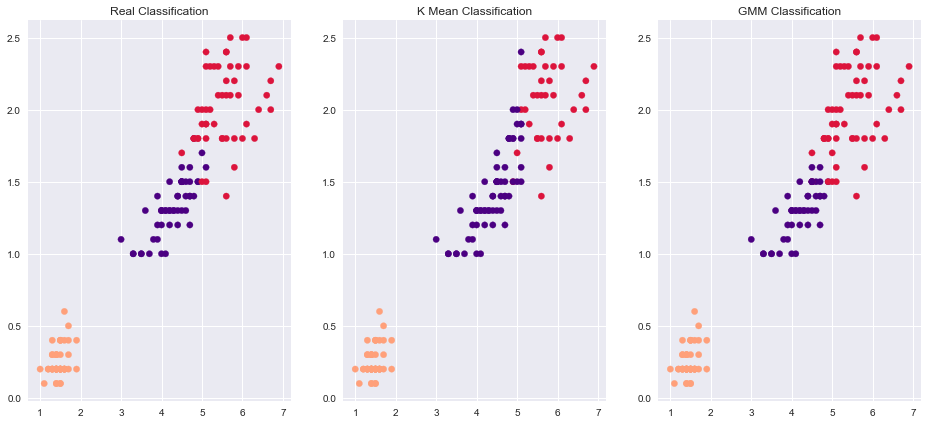

In [19]:
plt.figure(figsize=(16,7))
# Plot the Original Classifications
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=color[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=color[y_pred], s=40)
plt.title('K Mean Classification')

plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=color[y_gmm_pred], s=40)
plt.title('GMM Classification')

In [20]:
import sklearn.metrics as sm
# K Means Accuracy
print('K Means Accuracy')
print('Accuracy', sm.accuracy_score(y, y_pred) )
print('Confusion Matrix\n', sm.confusion_matrix(y, y_pred) )
sm.confusion_matrix
# GMM Accuracy
print('\n\nGMM Accuracy')
print('Accuracy', sm.accuracy_score(y, y_gmm_pred))
print('Confusion Matrix\n', sm.confusion_matrix(y, y_gmm_pred))

K Means Accuracy
Accuracy 0.8933333333333333
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


GMM Accuracy
Accuracy 0.9666666666666667
Confusion Matrix
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
